# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [85]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

In [86]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

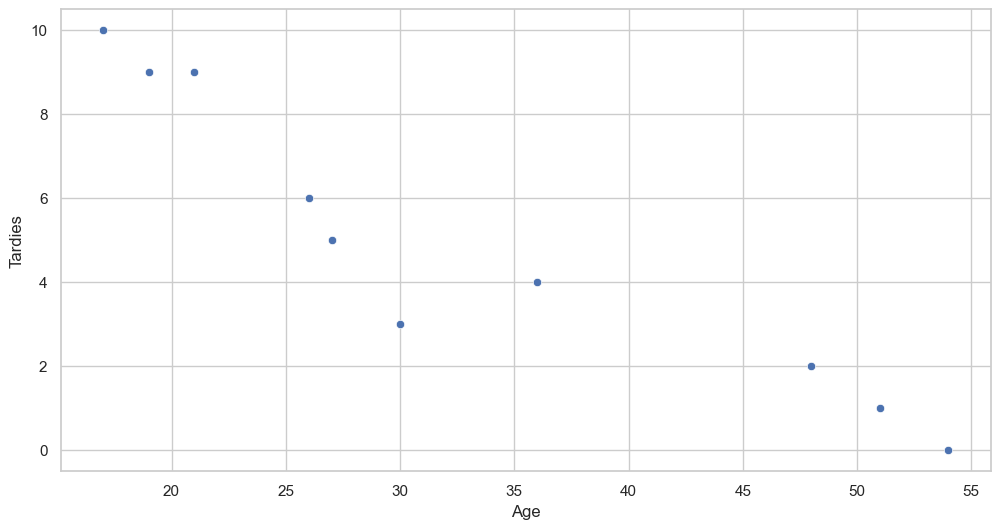

In [87]:
sns.scatterplot(x= student_data["Age"], y=student_data["Tardies"], data=student_data)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [88]:
# There is a clear downward trend, or negative correlation. 
# Meaning; generally, the older the student, the the lower the amount of tardies.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [89]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [90]:
# -0.94

In [91]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [92]:
# -45.57

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [93]:
X = student_data[["Age"]]
y = student_data.Tardies
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [94]:
#Outcome variable = tardiness
#Type of regression - linear regression

Plot your regression model on your scatter plot.

In [95]:
lr.coef_

array([-0.24282077])

In [96]:
lr.intercept_

12.888803363135771

In [97]:
student_data["prediction_tardies"] = student_data.Age * lr.coef_[0] + lr.intercept_

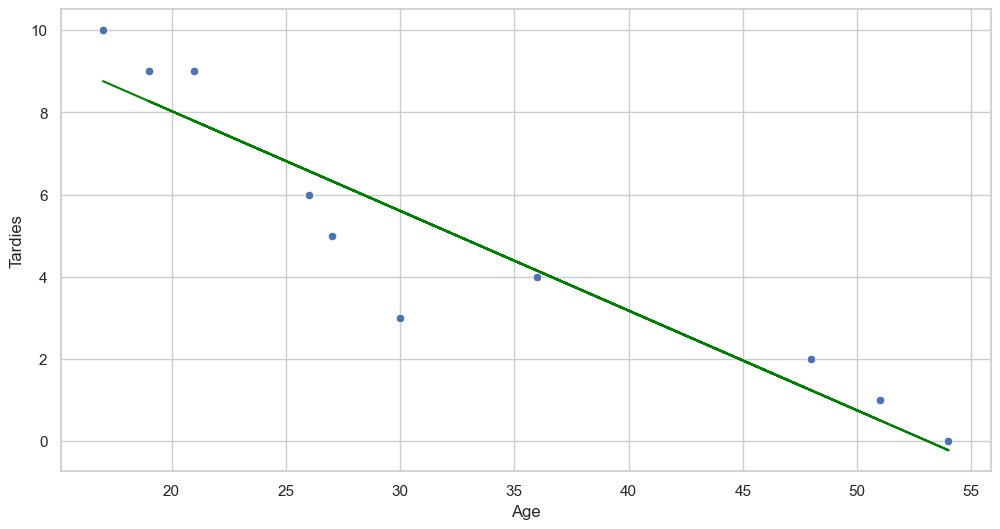

In [98]:
sns.scatterplot(x= student_data["Age"], y=student_data["Tardies"], data=student_data)
plt.plot(student_data.Age, student_data.prediction_tardies, c="green")
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [99]:
# The model accurately reflects the negative correlation - it shows age to be a good predictor of tardiness.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [100]:
vehicles = pd.read_csv("vehicles.csv")

In [101]:
vehicles.columns = vehicles.columns.str.replace(" ", "_")
vehicles.columns = vehicles.columns.str.replace("/", "_")
vehicles

,Make,Model,Year,Engine_Displacement,Cylinders,Transmission,Drivetrain,Vehicle_Class,Fuel_Type,Fuel_Barrels_Year,City_MPG,Highway_MPG,Combined_MPG,CO2_Emission_Grams_Mile,Fuel_Cost_Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [102]:
corr_selected = vehicles[["Year", "Cylinders", "Fuel_Barrels_Year", "Combined_MPG", "Fuel_Cost_Year", "CO2_Emission_Grams_Mile"]].corr()

In [103]:
corr_selected

,Year,Cylinders,Fuel_Barrels_Year,Combined_MPG,Fuel_Cost_Year,CO2_Emission_Grams_Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel_Barrels_Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined_MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel_Cost_Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2_Emission_Grams_Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [104]:
#Most important variable for determining CO2 emissions is Fuel_Barrels_Year.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [105]:
results = smf.ols("CO2_Emission_Grams_Mile ~ Year + Cylinders + Fuel_Barrels_Year + Combined_MPG + Fuel_Cost_Year",  data = vehicles).fit()

In [106]:
#Multiple linear regression being used

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [107]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                             17:38:40   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel_Barrels_Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined_MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel_Cost_Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
#Fuel Barrels/Year is the most important variable

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [113]:
data = {"X": [1, 3, 4, 6, 8, 9, 11, 14], "Y": [1, 2, 4, 4, 5, 7, 8, 13]}
party = pd.DataFrame(data)
party

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [114]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [116]:
X = party[["X"]]
y = party.Y
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [117]:
party["prediction_attendance"] = party.X * lr.coef_[0] + lr.intercept_

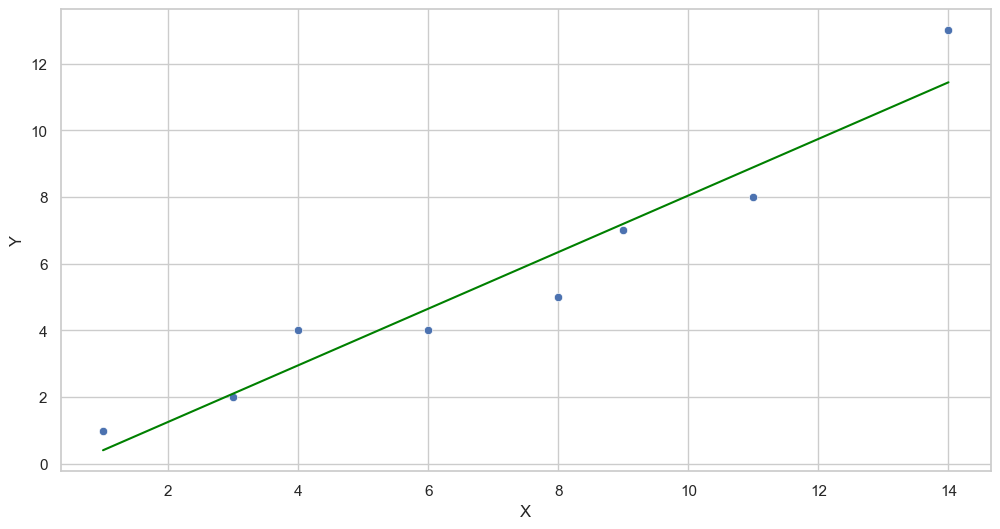

In [118]:
sns.scatterplot(x= "X", y= "Y", data=party)
plt.plot(party.X, party.prediction_attendance, c="green")
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
#Clear positive correlation between number of invites and number of people attending

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

<Axes: >

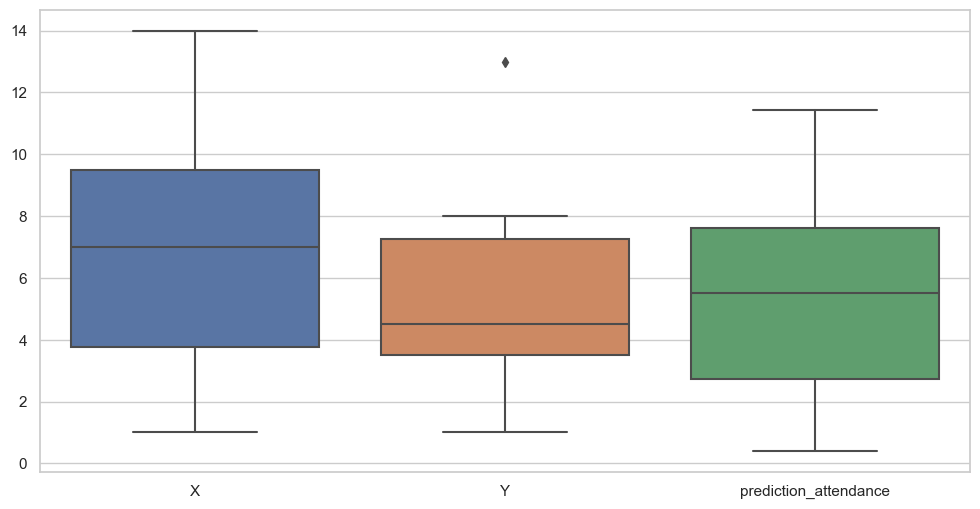

In [119]:
sns.boxplot(party)

In [120]:
def remove_outliers(list_):
    Q1 = list_.quantile(0.25)
    Q3 = list_.quantile(0.75)
    left = Q1 - 1.5 * (Q3-Q1)
    right = Q1 + 1.5 * (Q3-Q1)
    return pd.Series([el for el in list_ if el>=left and el<=right])

In [122]:
party["Y_no_outliers"] = remove_outliers(party["Y"])

In [123]:
party

,X,Y,prediction_attendance,Y_no_outliers
0,1,1,0.409091,1.0
1,3,2,2.106061,2.0
2,4,4,2.954545,4.0
3,6,4,4.651515,4.0
4,8,5,6.348485,5.0
5,9,7,7.196970,7.0
6,11,8,8.893939,8.0
7,14,13,11.439394,NaN


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

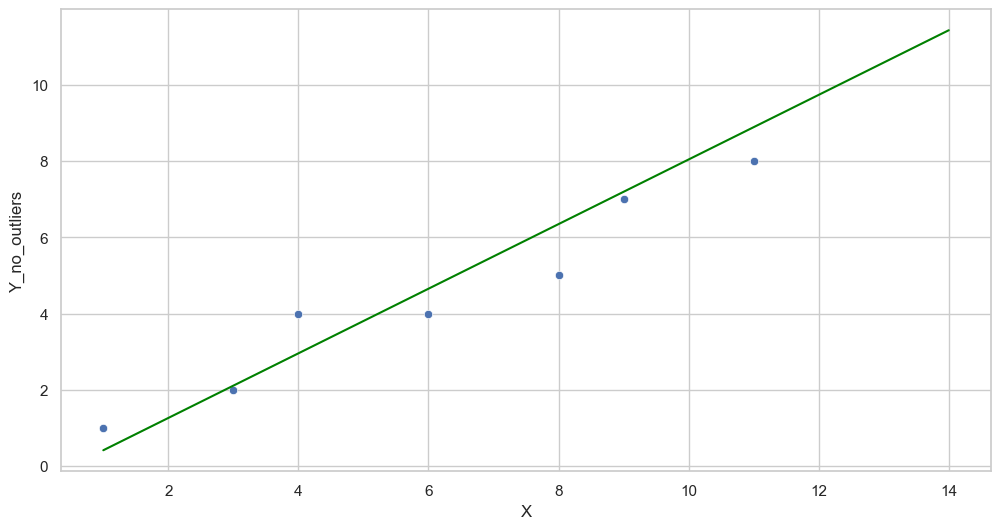

In [124]:
sns.scatterplot(x= "X", y= "Y_no_outliers", data=party)
plt.plot(party.X, party.prediction_attendance, c="green")
plt.show()

In [125]:
#Nothing changed, form of data is same with outlier and without it